# Q5

In [2]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [6]:
image = cv2.imread('Q5_image/img_improvment.png',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
print(image.shape)
equalize_image = cv2.equalizeHist(image) # this function is defined in opencv and simply apply histogram equalization on the image and returns result image

(288, 384)


(-0.5, 383.5, 287.5, -0.5)

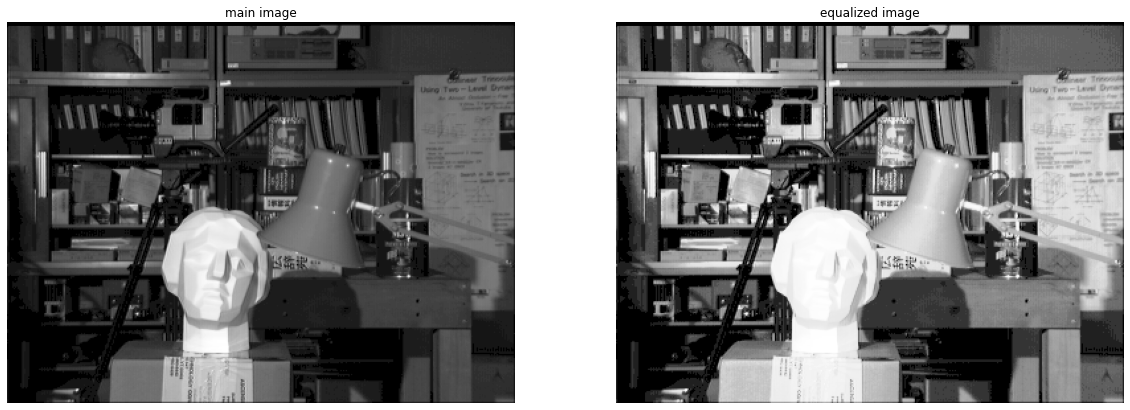

In [5]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b

<h3> in this section we want to implement the first method for ACE </h3>
<h3> you can use opencv library </h3>
<h3> use 48(6*8) grids (size of the grids should be 48*48) </h3> 

In [7]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  # توضیحات درباره این تابع در داک داده شده است
  x,y = image.shape
  output_image = image.copy()
  #######################
  #    your code here   #
  for i in range(0, x, gridSize):
    for j in range(0, y, gridSize):
      output_image[i:i+gridSize, j:j+gridSize] = cv2.equalizeHist(output_image[i:i+gridSize, j:j+gridSize])
  #######################
  
  return output_image

(-0.5, 383.5, 287.5, -0.5)

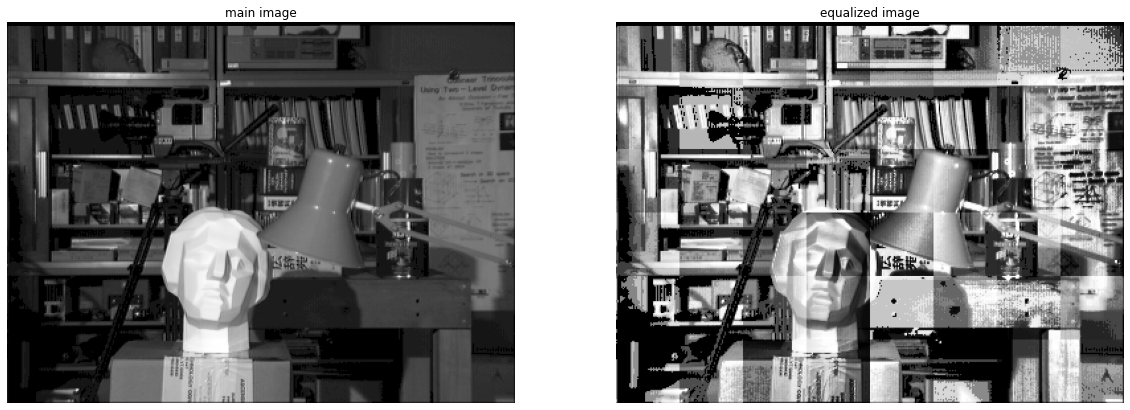

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part c

<h3> in this section we want to implement the second method for ACE </h3>

> Indented block


<h3> you can use opencv library </h3>

In [12]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    # توضیحات درباره این تابع در داک داده شده است
    output = image.copy()
    x,y = image.shape
    #######################
    #    your code here   #
    padded_image = cv2.copyMakeBorder(image, 35, 35, 35, 35, cv2.BORDER_CONSTANT, None, value = 0) # this function is used for add padding to the image. I used zero padding in this example, four numbers that are in parameters, show the amount of pixel added in each direction of image.
    for i in range(x):
      for j in range(y):
        equalized = cv2.equalizeHist(padded_image[i:i+gridSize[0], j:j+gridSize[1]])
        output[i, j] = equalized[gridSize[0]//2+1, gridSize[1]//2+1]
    #######################

    return output

(-0.5, 383.5, 287.5, -0.5)

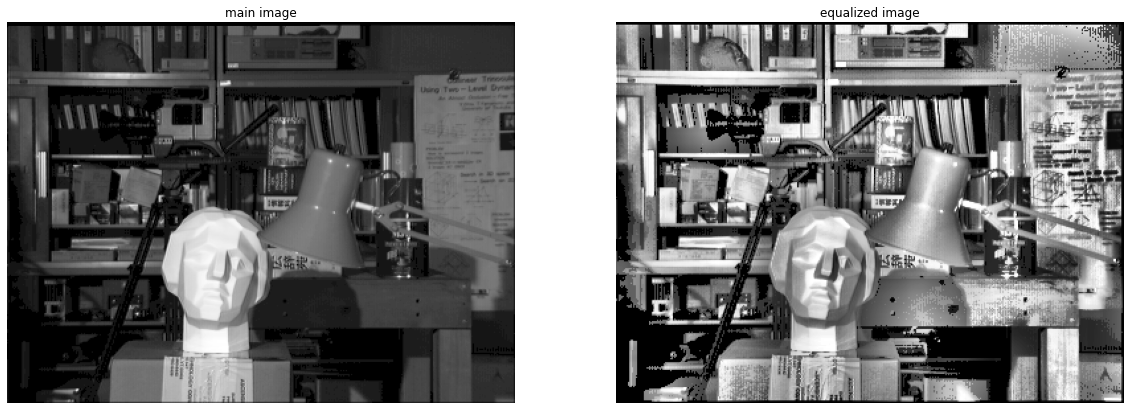

In [13]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part d

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [16]:
def calc_hist(image, clip_limit):
    '''
    Do not use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    # this function is as same as the calc_hist function in Q4 but it is specialized for CLAHE, values greater than limit are sticked to that limit, and the rest amount is added to variable count and finally count is divided between all intensity values
    hist = np.zeros(256,dtype=int)
    
    #######################
    #    your code here   #
    values, counts = np.unique(image, return_counts=True) 
    hist[values] = counts
    count = 0
    for i in range(len(hist)):
      if hist[i] > clip_limit:
        count += (hist[i]-clip_limit)
        hist[i] = clip_limit
    added = count // 256
    for i in range(len(hist)):
      hist[i] += added
    #######################
    
    return hist

In [12]:
def calc_cdf(channel, clip_limit):
  '''
    Do not use libraries
    calculate image cdf
    input(s):
      channel (ndarray): input image channel
    output(s):
      cdf (ndarray): computed cdf for input image channel
  '''
  # this function was discussed in Q4
  #######################
  hist = calc_hist(channel, clip_limit)
  pdf = hist / (channel.shape[0]*channel.shape[1])
  cdf = np.cumsum(pdf)
  #######################
  return cdf

In [13]:
def get_floor(i):
  return math.floor(i)
def Equalization(image, clip_limit):
  # this function uses the formula for histogram equalization. g = (L-1) * CDF
  cdf = calc_cdf(image, clip_limit)
  image = cdf[image]
  image = image * 255
  floor_func = np.vectorize(get_floor)
  image = floor_func(image)
  # for i in range(image.shape[0]):
  #   for j in range(image.shape[1]):
  #     image[i, j] = cdf[image[i, j]] * 255
  return image

In [17]:
def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    # این تابع در داک به طور مفصل توضیح داده شده است
    output = image.copy()
    x,y = image.shape
    #    your code here   #
    padded_image = cv2.copyMakeBorder(image, 35, 35, 35, 35, cv2.BORDER_CONSTANT, None, value = 0) # this function is for adding padding
    for i in range(x):
      for j in range(y):
        equalized = Equalization(padded_image[i:i+gridSize[0], j:j+gridSize[1]], clip_limit)
        output[i, j] = equalized[gridSize[0]//2+1, gridSize[1]//2+1]
    #######################
    return output

(-0.5, 383.5, 287.5, -0.5)

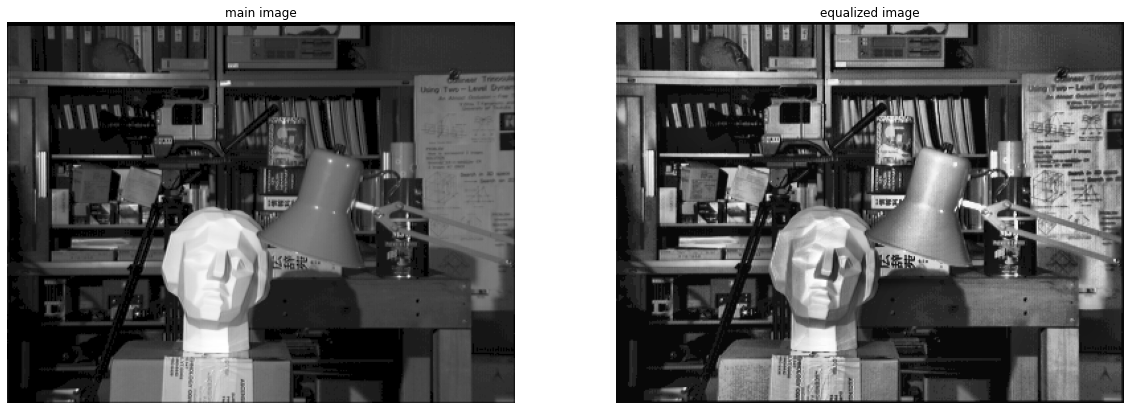

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 150)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')